# Seguro de carros

O objetivo deste notebook é empregar dados disponíveis para quantificar os preços de seguros. Para atingir esse propósito, realizaremos uma análise exploratória dos dados e desenvolveremos um modelo preditivo.

Os dados foram retirados no kaggle: https://www.kaggle.com/

**1) Definição do Problema**

**Objetivo**: O objetivo desta análise é identificar as variáveis que exercem maior influência no preço do seguro.

## Exploração dos Dados

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
train =pd.read_csv('./resources/train.csv')
test = pd.read_csv('./resources/test.csv')

train.shape

# CÓPIA DO DATASET
trainOriginal = train.copy()
testOriginal = test.copy()

### **Variável Alvo:** FATORSEGURO

---

**DICIONÁRIO DE DADOS**

- **ID:** NÚMERO DO LANÇAMENTO DO SEGURO
- **MARCA:** MARCA DO VEÍCULO
- **MODELO:** MODELO DO VEÍCULO
- **COR:** COR DO VEÍCULO
- **IDADE:** IDADE DO CONDUTOR
- **SEXO:** SEXO DO CONDUTOR
- **FATORSEGURO:** FATOR DO SEGURO

---

### Tipos de Variáveis

#### *Variáveis Numéricas*

**Discretas**
- FATORSEGURO

**Contínuas**
- ID
- IDADE

#### *Variáveis Categóricas*
- MARCA
- MODELO
- COR

In [18]:
train.dtypes

ID               int64
MARCA           object
MODELO          object
COR             object
IDADE            int64
SEXO            object
FATORSEGURO    float64
dtype: object

Teremos que transformar em valores numéricos: **MARCA**, **MODELO**, **COR** e **SEXO**. 

In [19]:
# SOMAR O NÚMERO DE DADOS FALTANTES POR PARÂMETRO
train.isnull().sum().sort_values(ascending=False)

ID             0
MARCA          0
MODELO         0
COR            0
IDADE          0
SEXO           0
FATORSEGURO    0
dtype: int64

Não há dados faltantes.
Logo não há necessidade de tratar informações neste sentido.

In [20]:
train.head()

ID  MARCA   MODELO    COR  IDADE SEXO  FATORSEGURO
0   0     GM  TRACKER  PRATA     63    F         7.93
1   1   FIAT   STRADA  PRETO     92    M        20.01
2   2   FIAT    PALIO   AZUL     70    M        13.56
3   3  HONDA     CITY  VERDE     33    M         6.34
4   4     VV     POLO  CINZA     89    M        20.21

In [21]:
train.describe()

ID          IDADE    FATORSEGURO
count  100000.000000  100000.000000  100000.000000
mean    49999.500000      58.491720      10.509042
std     28867.657797      23.584659       4.496733
min         0.000000      18.000000       2.750000
25%     24999.750000      38.000000       7.190000
50%     49999.500000      58.000000       9.950000
75%     74999.250000      79.000000      13.120000
max     99999.000000      99.000000      35.430000

In [22]:
train.describe(include=['O'])

MARCA  MODELO     COR    SEXO
count   100000  100000  100000  100000
unique       7      38       7       2
top       FIAT  CRONOS   CINZA       M
freq     22837    5127   15478   50977

Olhando esses dados observamos que:

* A Marca mais frequente é **FIAT**.
* O Modelo mais frequente é **CRONOS**.
* A Cor mais frequente é **CINZA**.
* A Sexo mais frequente é **M** = **Masculino**.

**Padronização das variáveis**


---
É necessário trabalhar com variáveis numéricas para o modelo matemático. Portanto, é preciso converter os dados de entrada que estão em formato de categoria para números.

- No exemplo abaixo, foi realizada a conversão dos possíveis valores das variáveis "**MARCA**", "**MODELO**", "**COR**" e "**SEXO**"

In [23]:
Dmarca={ 
  "GM":1,
  "VV":2,
  "HONDA":3,
  "FIAT":4,
  "JEEP":5,
  "HYUNDAI":6,
  "TOYOTA":7 
}

Dmodelo= {
  'MONTANA':1,
  'POLO':2,
  'HRV':3,
  'CRV':4,
  'SPIN':5,
  'TRACKER':6,
  'ONIX':7,
  'S10':8,
  'EQUINOX':9,
  'TRAILBLAZER':10,
  'TCROSS':11,
  'GOL':12,
  'VIRTUS':13,
  'JETTA':14,
  'TAOS':15,
  'SAVEIRO':16,
  'ZRV':17,
  'FIT':18,
  'WRV':19,
  'CITY':20,
  'CIVIC':21,
  'COROLLA':22,
  'YARIS':23,
  'COROLLACROSS':24,
  'HILUX':25,
  'COMPASS':26,
  'RENEGADE':27,
  'COMMANDER':28,
  'CRONOS':29,
  'ARGOS':30,
  'MOBI':31,
  'UNO':32,
  'PALIO':33,
  'FASTBACK':34,
  'STRADA':35,
  'TORO':36,
  'CRETA':37,
  'HB20':38
}

Dcor={
  "BRANCO":1,
  "CINZA":2,
  "PRATA":3,
  "PRETO":4,
  "VERDE":5,
  "AZUL":6,
  "LARANJA":7
}

Dsexo={
  "M":0,
  "F":1
}

veiculo = [
  {"MARCA": "GM", "MODELO": "MONTANA", "VALOR": 32000},
  {"MARCA": "GM", "MODELO": "SPIN", "VALOR": 45000},
  {"MARCA": "GM", "MODELO": "TRACKER", "VALOR": 70000},
  {"MARCA": "GM", "MODELO": "ONIX", "VALOR": 40000},
  {"MARCA": "GM", "MODELO": "S10", "VALOR": 95000},
  {"MARCA": "GM", "MODELO": "EQUINOX", "VALOR": 120000},
  {"MARCA": "GM", "MODELO": "TRAILBLAZER", "VALOR": 160000},
  {"MARCA": "VV", "MODELO": "POLO", "VALOR": 55000},
  {"MARCA": "VV", "MODELO": "TCROSS", "VALOR": 110000},
  {"MARCA": "VV", "MODELO": "GOL", "VALOR": 38000},
  {"MARCA": "VV", "MODELO": "VIRTUS", "VALOR": 65000},
  {"MARCA": "VV", "MODELO": "JETTA", "VALOR": 130000},
  {"MARCA": "VV", "MODELO": "TAOS", "VALOR": 140000},
  {"MARCA": "VV", "MODELO": "SAVEIRO", "VALOR": 60000},
  {"MARCA": "HONDA", "MODELO": "HRV", "VALOR": 105000},
  {"MARCA": "HONDA", "MODELO": "ZRV", "VALOR": 115000},
  {"MARCA": "HONDA", "MODELO": "FIT", "VALOR": 55000},
  {"MARCA": "HONDA", "MODELO": "CRV", "VALOR": 150000},
  {"MARCA": "HONDA", "MODELO": "WRV", "VALOR": 70000},
  {"MARCA": "HONDA", "MODELO": "CITY", "VALOR": 85000},
  {"MARCA": "HONDA", "MODELO": "CIVIC", "VALOR": 120000},
  {"MARCA": "TOYOTA", "MODELO": "COROLLA", "VALOR": 110000},
  {"MARCA": "TOYOTA", "MODELO": "YARIS", "VALOR": 60000},
  {"MARCA": "TOYOTA", "MODELO": "COROLLACROSS", "VALOR": 140000},
  {"MARCA": "TOYOTA", "MODELO": "HILUX", "VALOR": 190000},
  {"MARCA": "JEEP", "MODELO": "COMPASS", "VALOR": 130000},
  {"MARCA": "JEEP", "MODELO": "RENEGADE", "VALOR": 110000},
  {"MARCA": "JEEP", "MODELO": "COMMANDER", "VALOR": 180000},
  {"MARCA": "JEEP", "MODELO": "RENEGADE", "VALOR": 110000},
  {"MARCA": "FIAT", "MODELO": "CRONOS", "VALOR": 70000},
  {"MARCA": "FIAT", "MODELO": "ARGOS", "VALOR": 65000},
  {"MARCA": "FIAT", "MODELO": "MOBI", "VALOR": 45000},
  {"MARCA": "FIAT", "MODELO": "UNO", "VALOR": 40000},
  {"MARCA": "FIAT", "MODELO": "PALIO", "VALOR": 38000},
  {"MARCA": "FIAT", "MODELO": "FASTBACK", "VALOR": 90000},
  {"MARCA": "FIAT", "MODELO": "CRONOS", "VALOR": 70000},
  {"MARCA": "FIAT", "MODELO": "STRADA", "VALOR": 85000},
  {"MARCA": "FIAT", "MODELO": "TORO", "VALOR": 120000},
  {"MARCA": "HYUNDAI", "MODELO": "CRETA", "VALOR": 110000},
  {"MARCA": "HYUNDAI", "MODELO": "HB20", "VALOR": 55000},
]


train['MARCA'] = train['MARCA'].map(Dmarca)
train['MODELO'] = train['MODELO'].map(Dmodelo)
train['COR'] = train['COR'].map(Dcor)
train['SEXO'] = train['SEXO'].map(Dsexo)
train.head()


test['MARCA'] = test['MARCA'].map(Dmarca)
test['MODELO'] = test['MODELO'].map(Dmodelo)
test['COR'] = test['COR'].map(Dcor)
test['SEXO'] = test['SEXO'].map(Dsexo)

In [24]:
train.describe()

ID          MARCA         MODELO            COR  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    49999.500000       3.478430      20.138390       4.227530   
std     28867.657797       1.822989      10.730999       1.890676   
min         0.000000       1.000000       1.000000       1.000000   
25%     24999.750000       2.000000      11.000000       3.000000   
50%     49999.500000       3.000000      21.000000       4.000000   
75%     74999.250000       5.000000      29.000000       6.000000   
max     99999.000000       7.000000      38.000000       7.000000   

               IDADE           SEXO    FATORSEGURO  
count  100000.000000  100000.000000  100000.000000  
mean       58.491720       0.490230      10.509042  
std        23.584659       0.499907       4.496733  
min        18.000000       0.000000       2.750000  
25%        38.000000       0.000000       7.190000  
50%        58.000000       0.000000       9.950000  
75%        79.000000       1.000000      13.120000  
max        99.000000       1.000000      35.430000

Agora, ao chamarmos o ```describe()```, todas as variáveis que transformamos em valores numéricos são retornadas também.

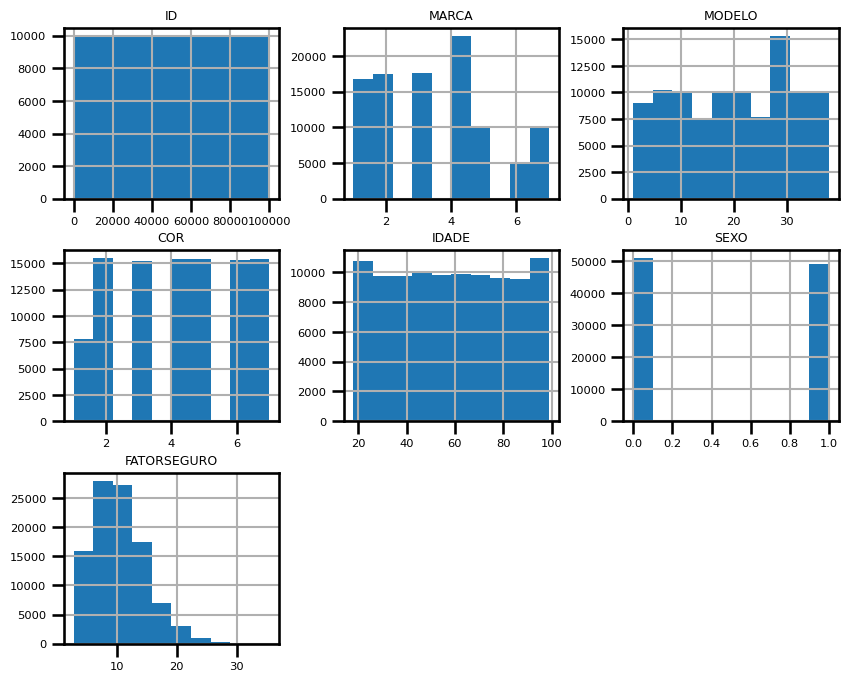

In [25]:
# Definir escala da fonte do gráfico
sns.set_context("talk", font_scale=0.5)

train.hist(figsize=(10,8));

Utilizando o método `describe()` do Pandas, podemos obter uma visão geral sobre a distribuição de cada variável, incluindo informações sobre possíveis outliers e valores faltantes. Além disso, plotar um histograma também é útil para visualizar a distribuição dos dados.

Essas etapas serão muito importantes na próxima fase, em que trabalharemos na limpeza dos dados. Nessa etapa, decidiremos se excluiremos entradas com valores faltantes ou se preencheremos esses valores utilizando métodos como a média ou mediana, por exemplo.

In [26]:
#Analisando a distribuição de fator seguro pelo gênero.
x = train[['SEXO', 'FATORSEGURO']].groupby(['SEXO']).count()
print(x)

      FATORSEGURO
SEXO             
0           50977
1           49023


In [27]:
#Analisando a distribuição de fator seguro pela idade.
x = train[['IDADE', 'FATORSEGURO']].groupby(['IDADE']).count()
print(x)

       FATORSEGURO
IDADE             
18            1225
19            1215
20            1228
21            1148
22            1191
...            ...
95            1255
96            1222
97            1189
98            1224
99            1242

[82 rows x 1 columns]


In [28]:
#Analisando a média do fator de seguro pela IDADE e SEXO.
x = train[['IDADE','SEXO','FATORSEGURO']].groupby(['IDADE','SEXO']).mean()
print(x)

            FATORSEGURO
IDADE SEXO             
18    0       11.538712
      1       11.425199
19    0       11.294304
      1       11.103108
20    0       11.357406
...                 ...
97    1       14.602794
98    0       15.411993
      1       14.908590
99    0       15.525987
      1       15.105381

[164 rows x 1 columns]


In [29]:
#Analisando a média do fator de seguro pelo gênero.
x = train[['SEXO', 'FATORSEGURO']].groupby(['SEXO']).mean()
print(x)

      FATORSEGURO
SEXO             
0       10.630290
1       10.382961


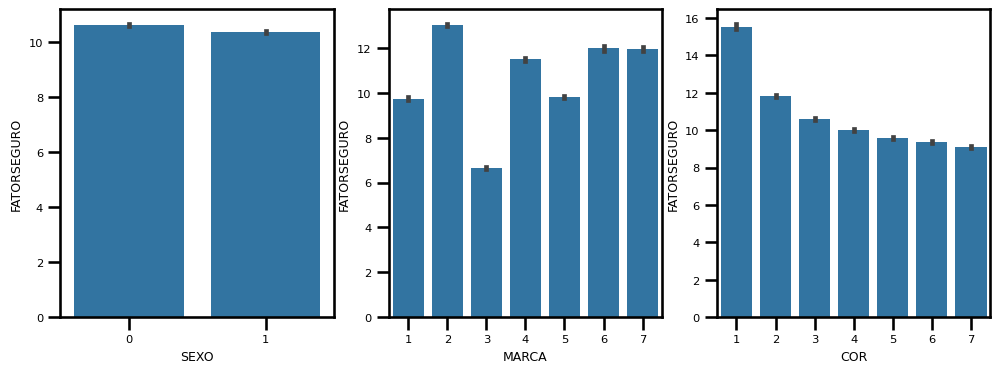

In [30]:
# Definir escala da fonte do gráfico
sns.set_context("talk", font_scale=0.5)

# Plotar os gráficos para FATORSEGURO vs SEXO, MARCA e COR
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='SEXO', y='FATORSEGURO', data=train, ax=axis1)
sns.barplot(x='MARCA', y='FATORSEGURO', data=train, ax=axis2)
sns.barplot(x='COR', y='FATORSEGURO', data=train, ax=axis3);

<Axes: xlabel='IDADE', ylabel='FATORSEGURO'>

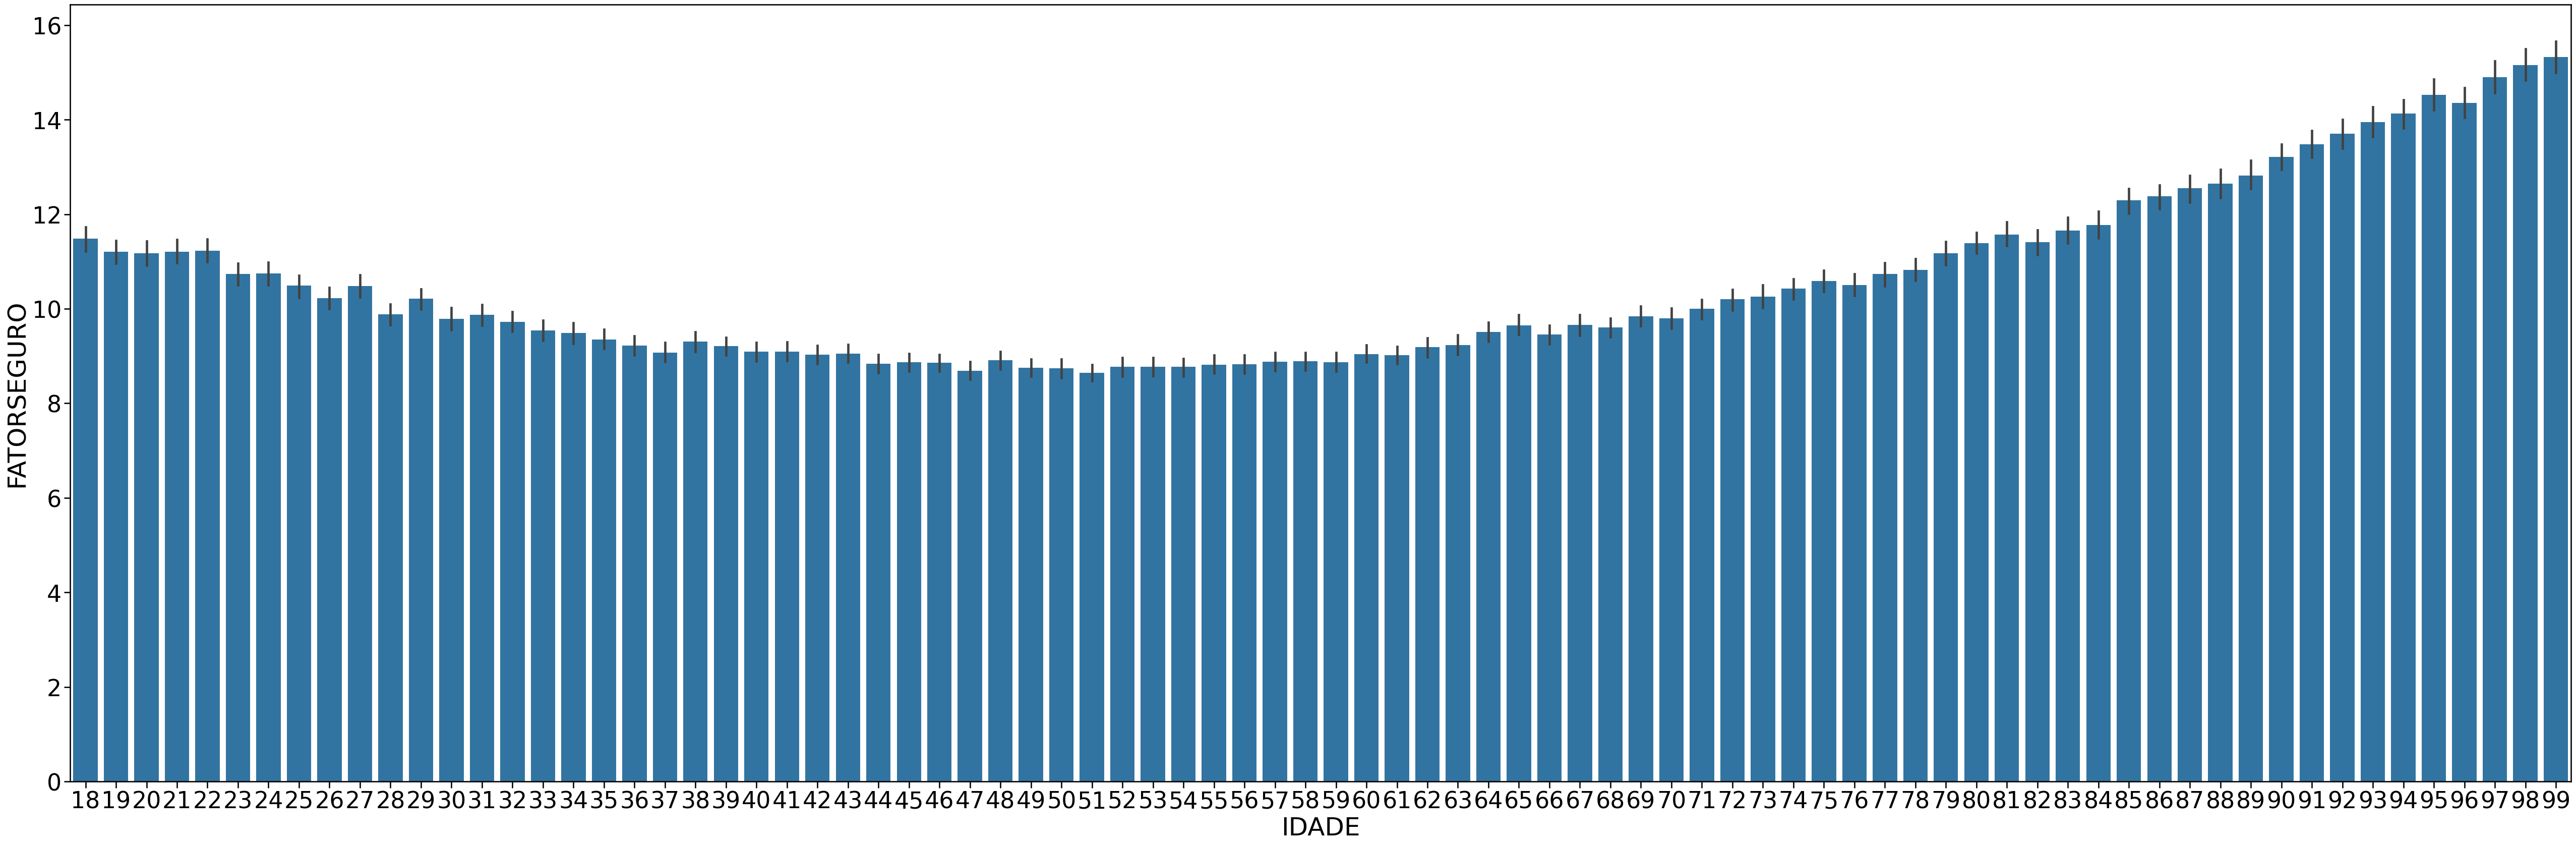

In [31]:
# Definir escala da fonte do gráfico
sns.set_context("talk", font_scale=2)

# Plotar os gráficos para FATORSEGURO vs IDADE
fig, (axis1) = plt.subplots(1,1, figsize=(64,20))

sns.barplot(x='IDADE', y='FATORSEGURO', data=train, ax=axis1)

<Axes: xlabel='MODELO', ylabel='FATORSEGURO'>

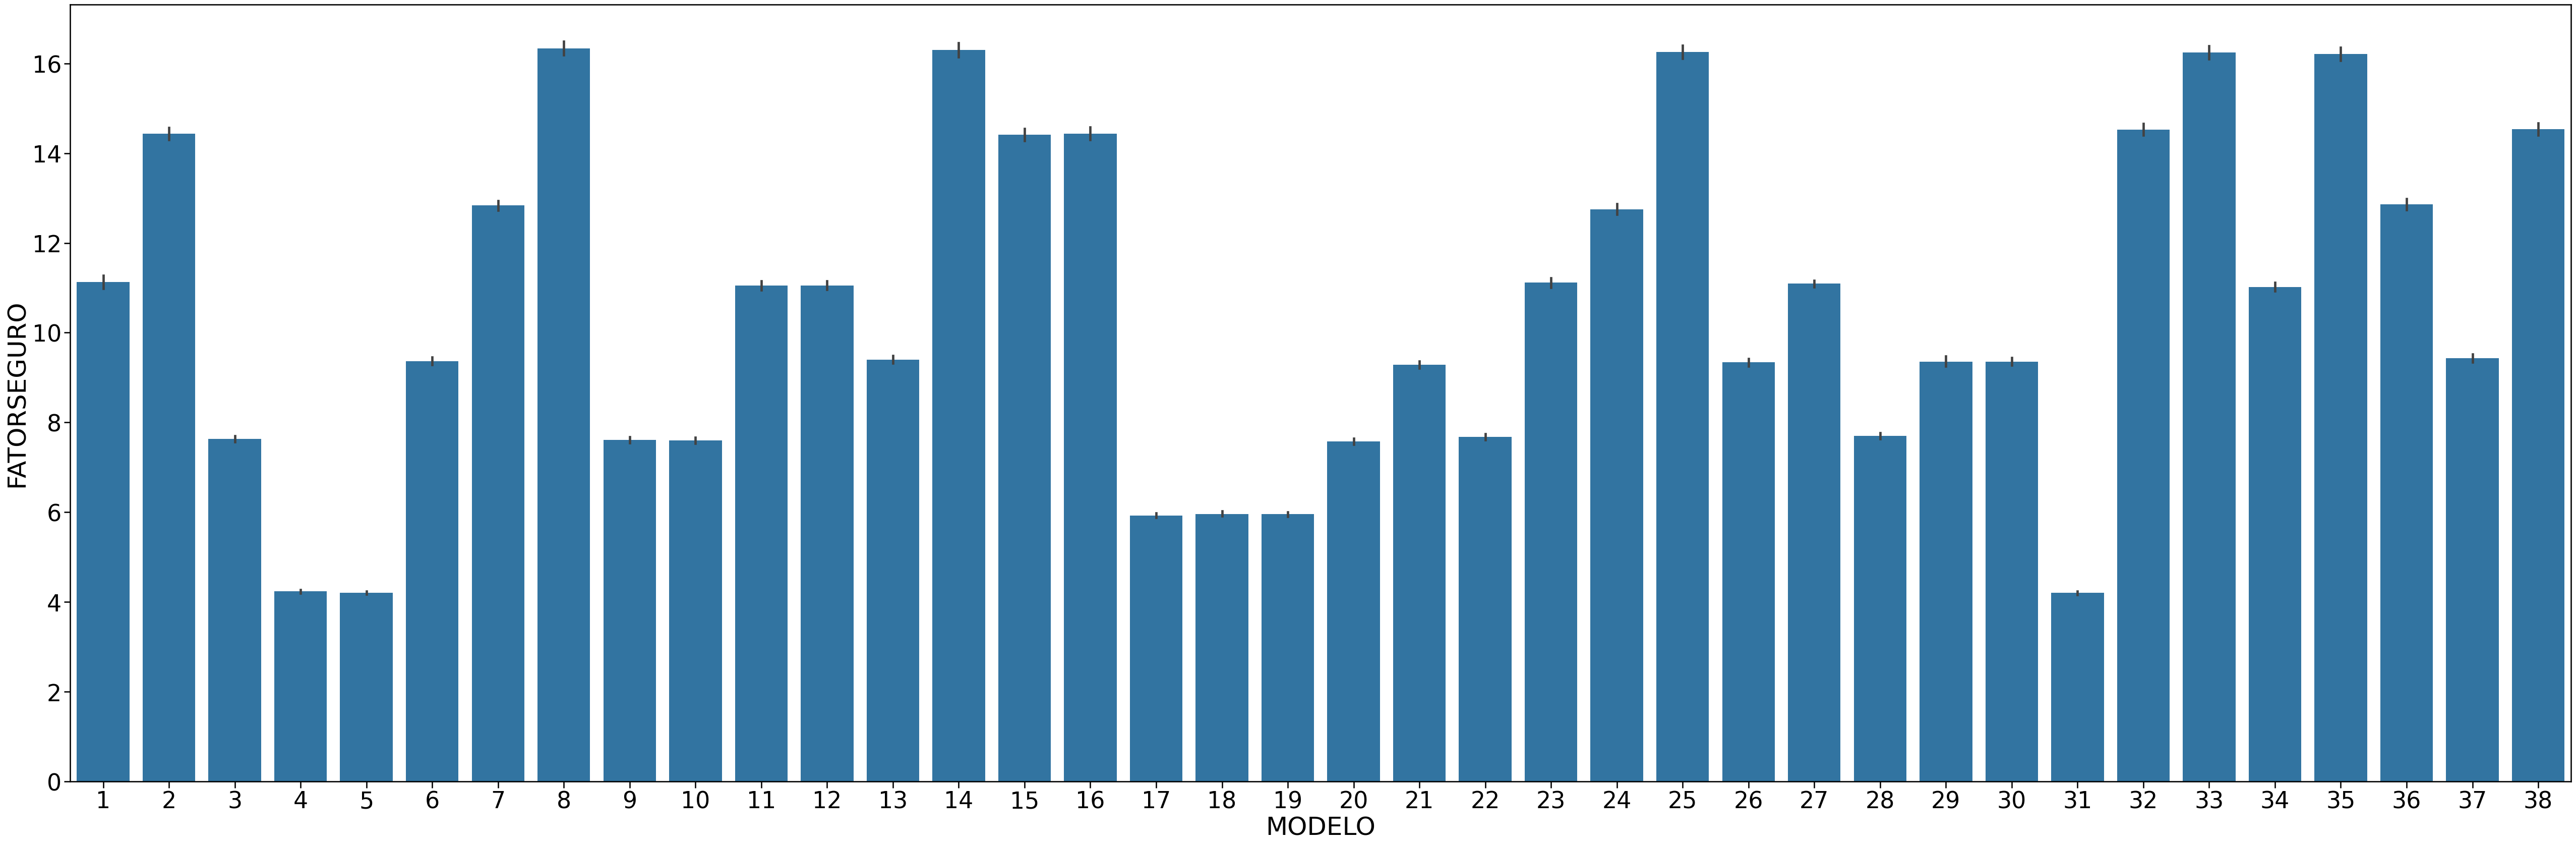

In [32]:
# Definir escala da fonte do gráfico
sns.set_context("talk", font_scale=2)

# Plotar os gráficos para FATORSEGURO vs MODELO
fig, (axis1) = plt.subplots(1,1, figsize=(64,20))

sns.barplot(x='MODELO', y='FATORSEGURO', data=train, ax=axis1)

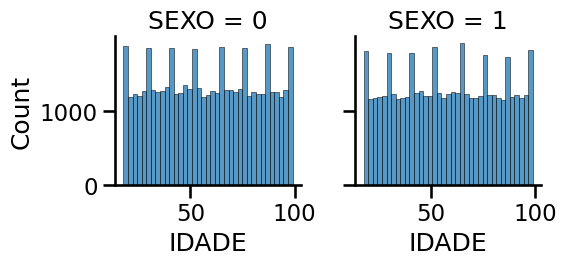

In [33]:
# Definir escala da fonte do gráfico
sns.set_context("talk", font_scale=1)

# FaceGrid PELOS DADOS DE 'SEXO' e 'IDADE'
idade_sexo = sns.FacetGrid(train, col='SEXO')
idade_sexo.map(sns.histplot, 'IDADE')

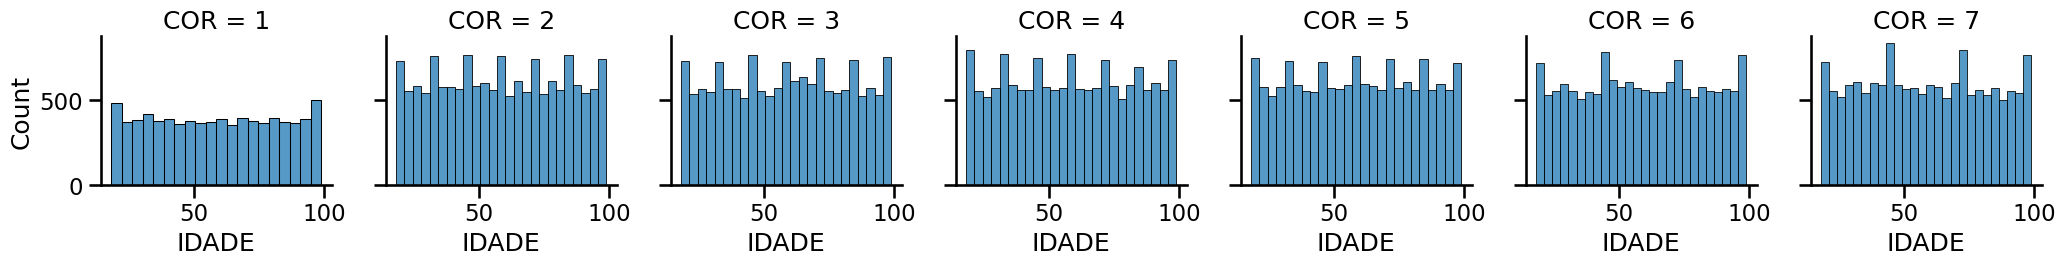

In [34]:
# FaceGrid PELOS DADOS DE 'COR' e 'IDADE'
cor_idade = sns.FacetGrid(train, col='COR')
cor_idade.map(sns.histplot, 'IDADE')

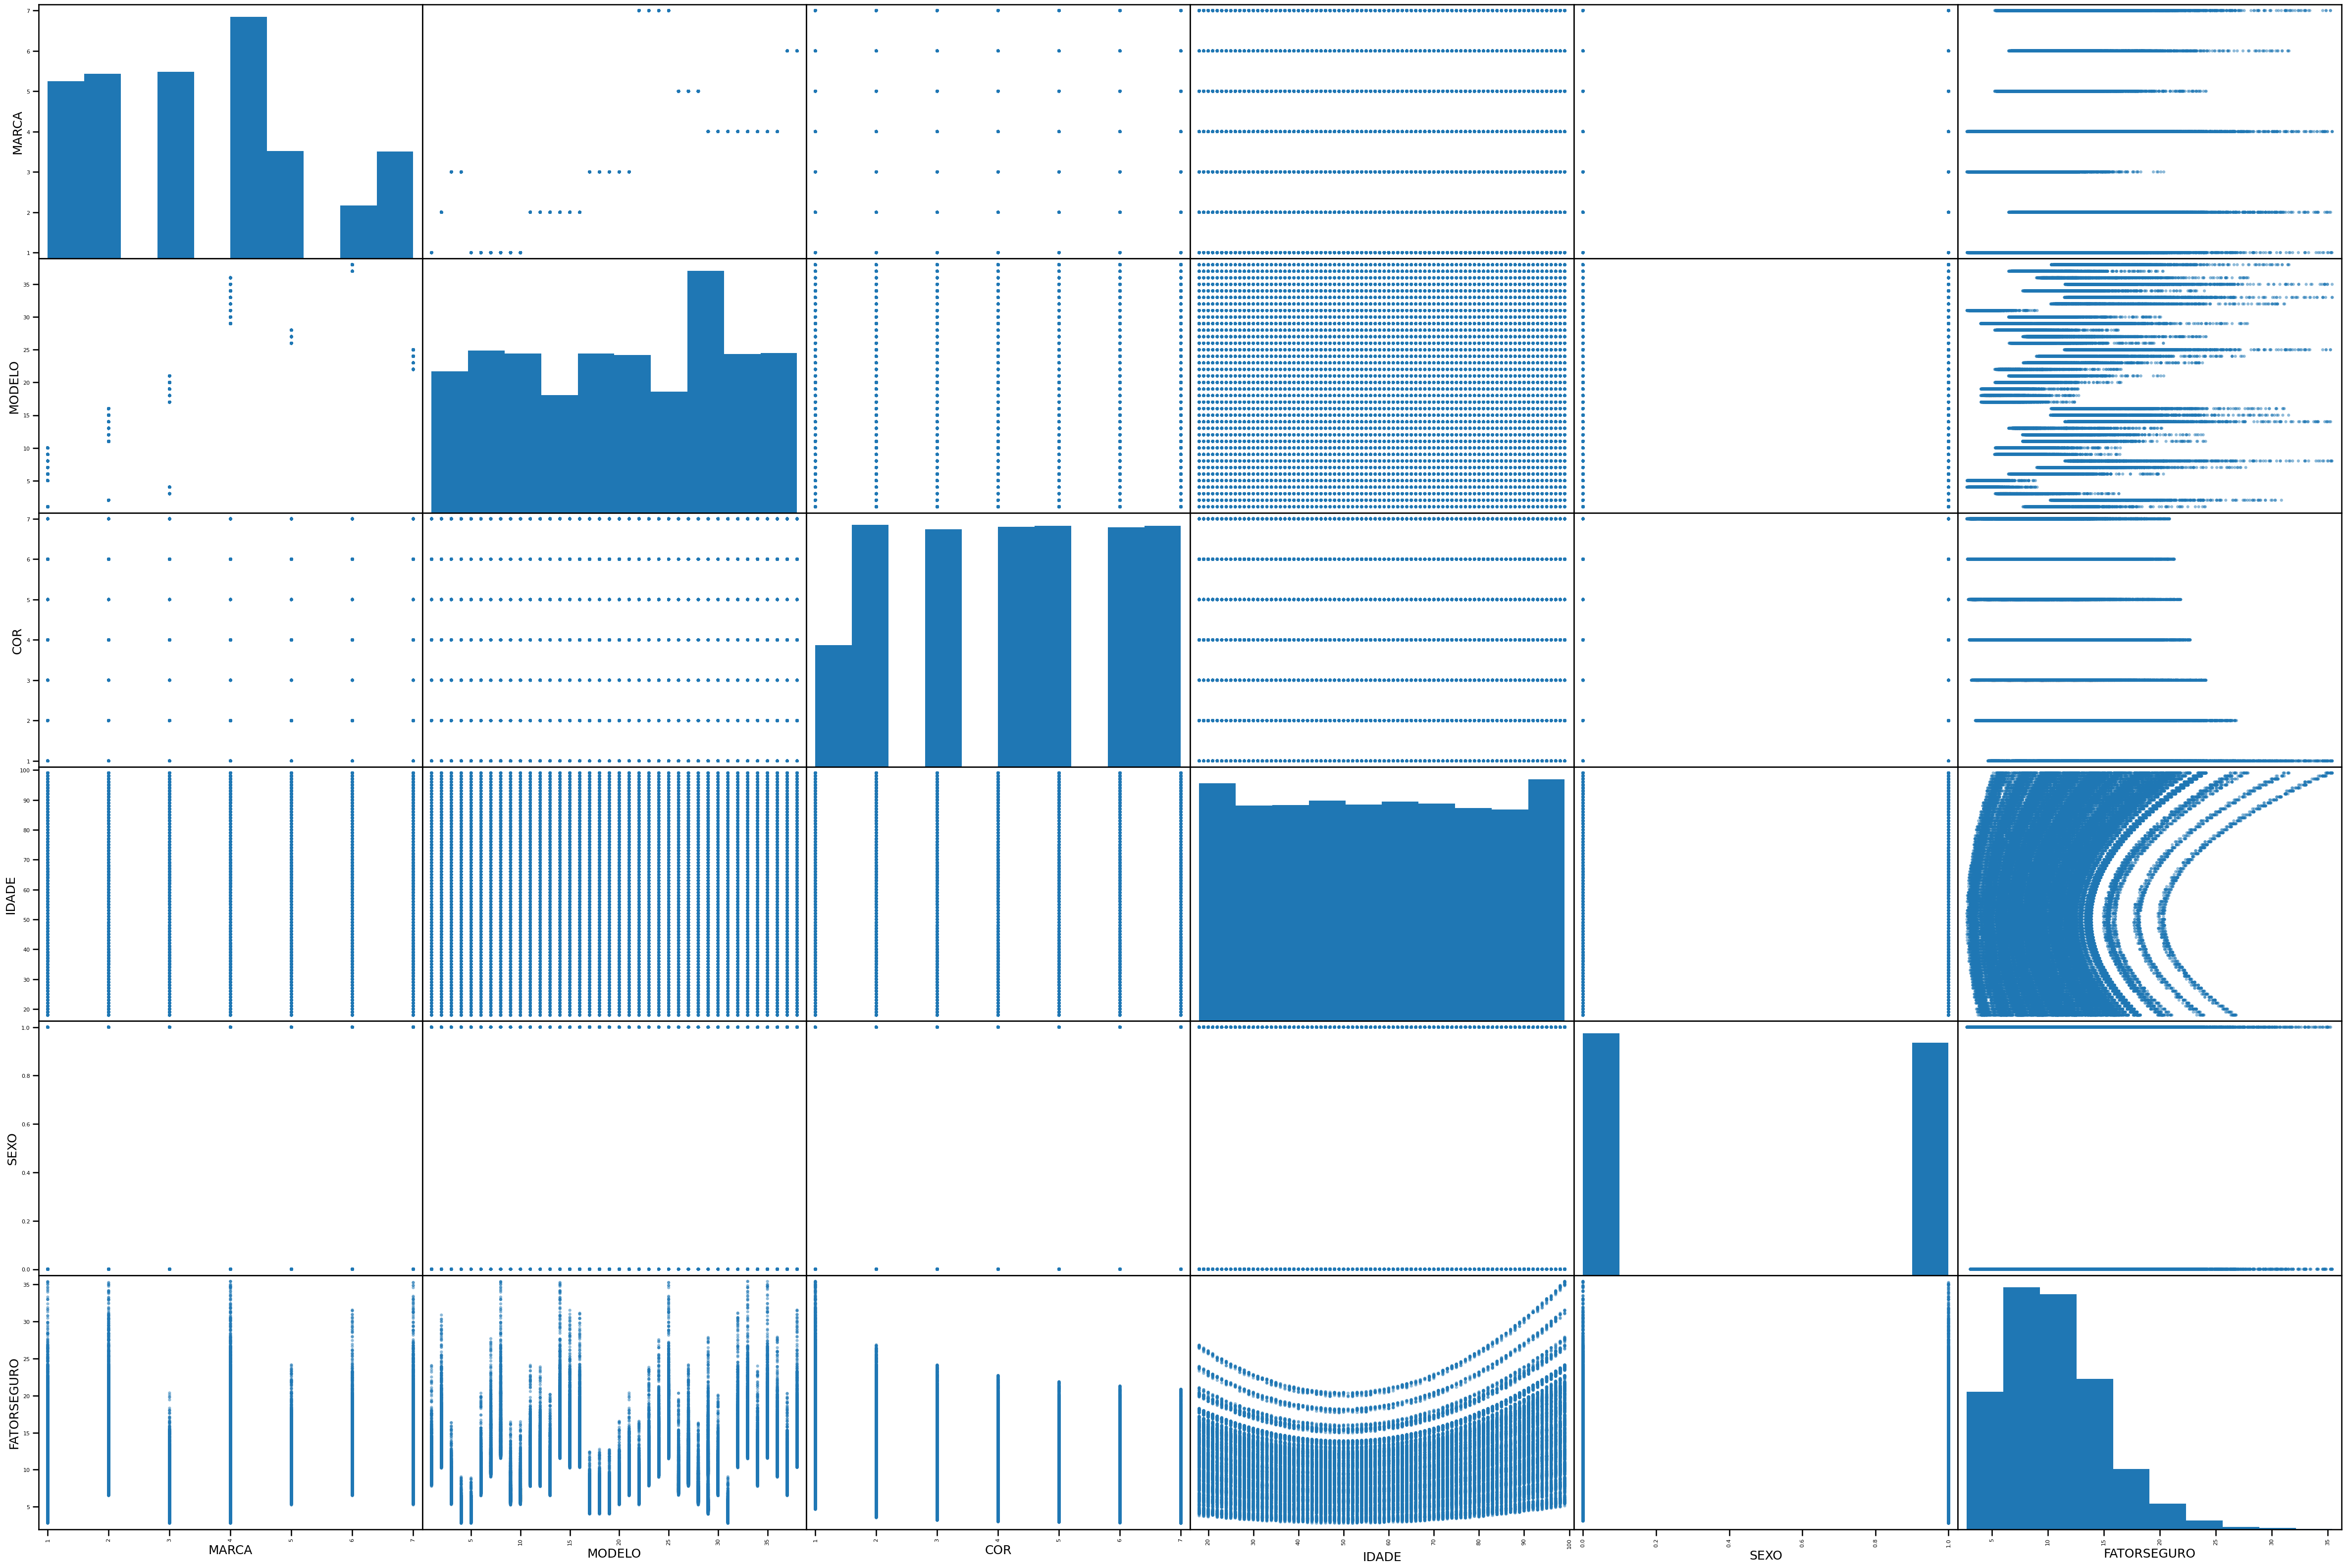

In [35]:
# Definir escala da fonte do gráfico
sns.set_context("talk", font_scale=1)

# plotar uma scatter matrix
columns=['MARCA', 'MODELO','COR', 'IDADE', 'SEXO', 'FATORSEGURO']
pd.plotting.scatter_matrix(train[columns], figsize=(60, 40));

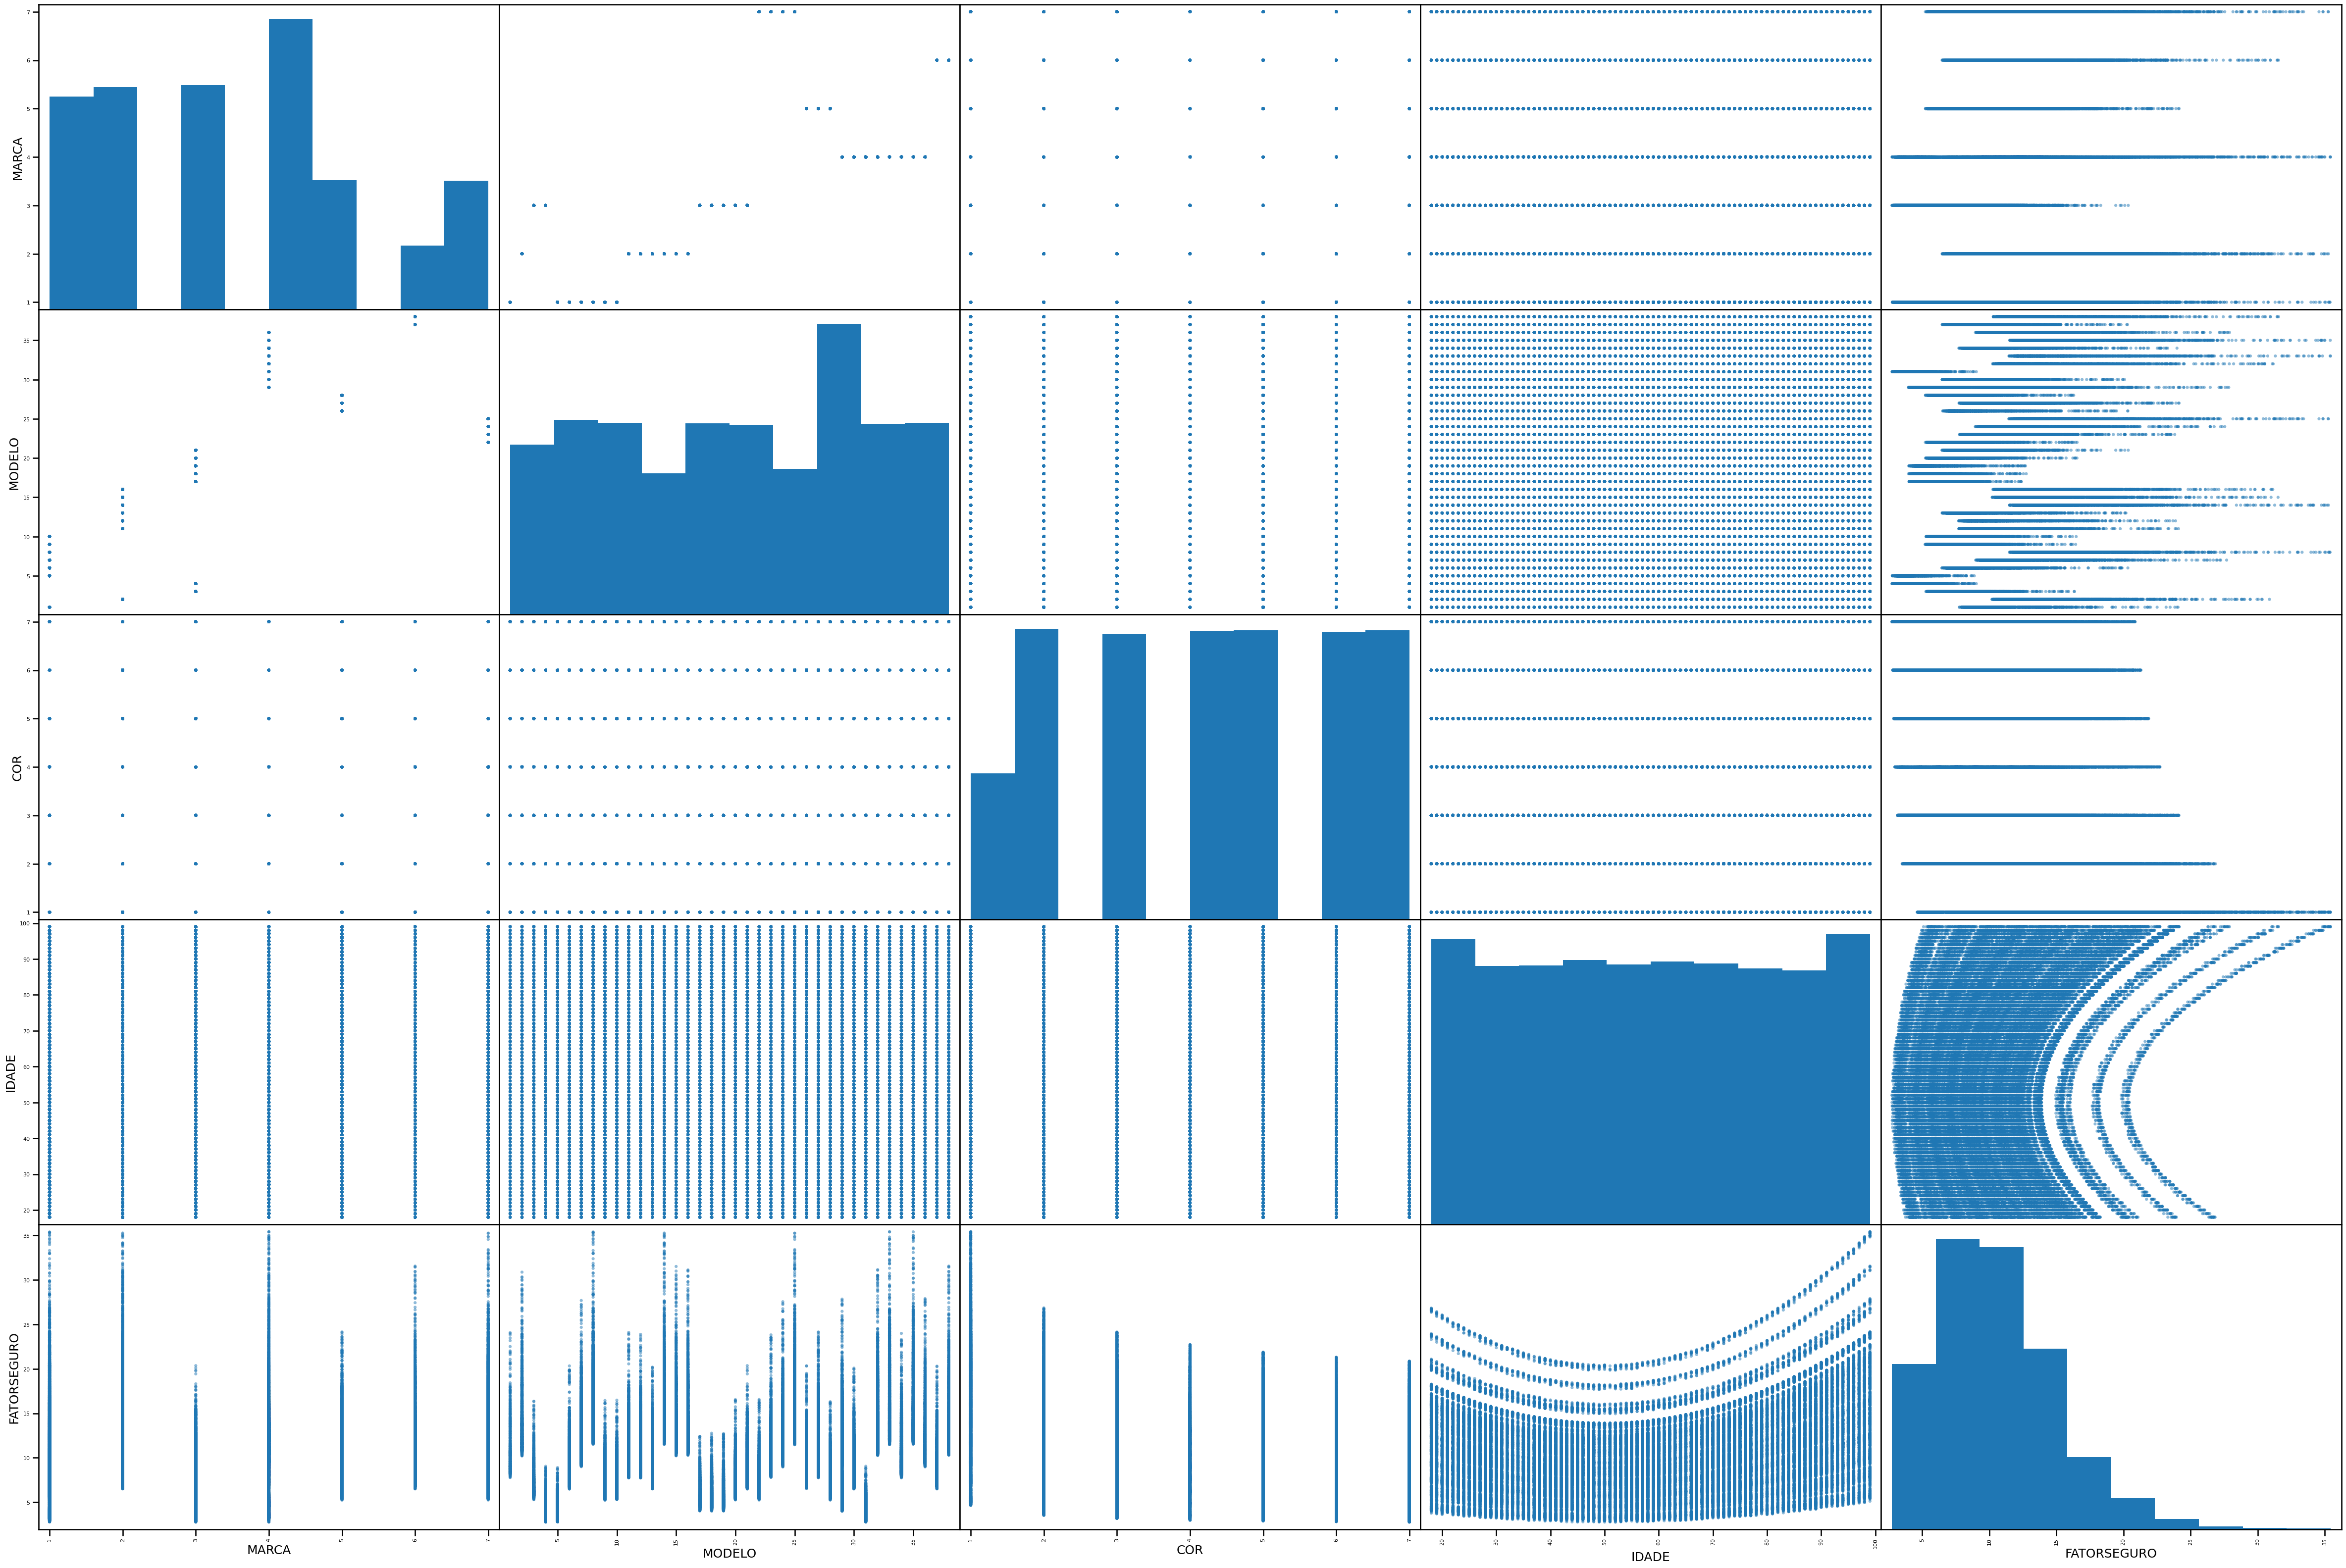

In [36]:
# Definir escala da fonte do gráfico
sns.set_context("talk", font_scale=1)

# plotar uma scatter matrix
columns=['MARCA', 'MODELO','COR', 'IDADE', 'FATORSEGURO']
pd.plotting.scatter_matrix(train[columns], figsize=(60, 40));

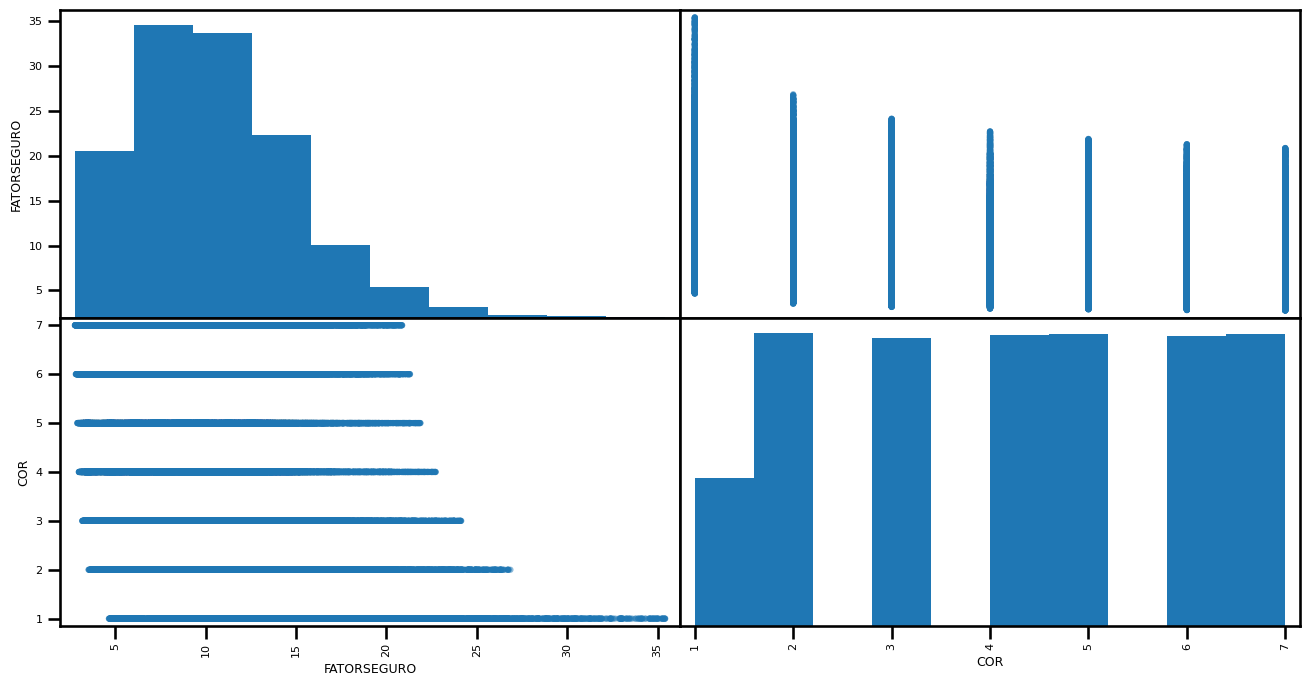

In [37]:
# Definir escala da fonte do gráfico
sns.set_context("talk", font_scale=0.5)

# plotar uma scatter matrix
columns = ['FATORSEGURO', 'COR']
pd.plotting.scatter_matrix(train[columns], figsize=(16, 8));


CORRELAÇÃO: 
                    ID     MARCA    MODELO       COR     IDADE      SEXO  \
ID           1.000000 -0.003044  0.001808  0.000708  0.001277 -0.003180   
MARCA       -0.003044  1.000000  0.713768  0.000279  0.002341 -0.002590   
MODELO       0.001808  0.713768  1.000000 -0.001075  0.002269  0.001474   
COR          0.000708  0.000279 -0.001075  1.000000 -0.001690  0.000887   
IDADE        0.001277  0.002341  0.002269 -0.001690  1.000000 -0.000682   
SEXO        -0.003180 -0.002590  0.001474  0.000887 -0.000682  1.000000   
FATORSEGURO  0.002962  0.086068  0.172224 -0.321760  0.246382 -0.027496   

             FATORSEGURO  
ID              0.002962  
MARCA           0.086068  
MODELO          0.172224  
COR            -0.321760  
IDADE           0.246382  
SEXO           -0.027496  
FATORSEGURO     1.000000  


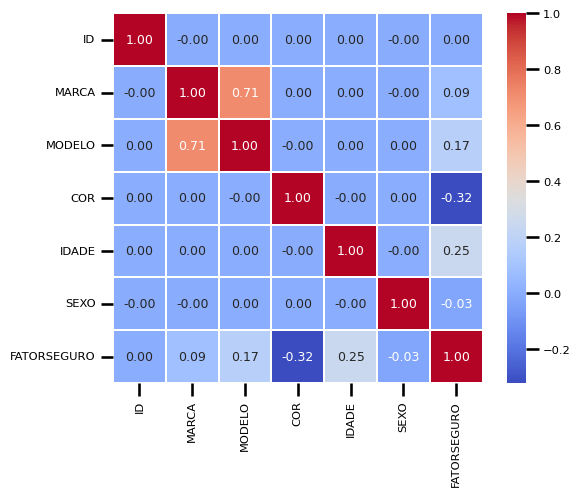

In [38]:
# plotar o heatmap para as variáveis numéricas

#CÁLCULO DA CORRELAÇÃO
correlacao = train.corr(numeric_only=True)
print("\nCORRELAÇÃO: \n", correlacao)

# PLOT GRÁFICO HEATMAP 
sns.heatmap(correlacao, cmap='coolwarm', fmt='.2f', linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True);

In [39]:
train.describe()

ID          MARCA         MODELO            COR  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    49999.500000       3.478430      20.138390       4.227530   
std     28867.657797       1.822989      10.730999       1.890676   
min         0.000000       1.000000       1.000000       1.000000   
25%     24999.750000       2.000000      11.000000       3.000000   
50%     49999.500000       3.000000      21.000000       4.000000   
75%     74999.250000       5.000000      29.000000       6.000000   
max     99999.000000       7.000000      38.000000       7.000000   

               IDADE           SEXO    FATORSEGURO  
count  100000.000000  100000.000000  100000.000000  
mean       58.491720       0.490230      10.509042  
std        23.584659       0.499907       4.496733  
min        18.000000       0.000000       2.750000  
25%        38.000000       0.000000       7.190000  
50%        58.000000       0.000000       9.950000  
75%        79.000000       1.000000      13.120000  
max        99.000000       1.000000      35.430000

## **PREPARAÇÃO DOS DADOS**

Até o momento, foram realizadas as seguintes etapas: 

* 1) **importação dos dados** para estruturas de DataFrame,
* 2) **transformação dos dados**,
* 3) **formulação de hipóteses**,
* 4) início de uma **análise exploratória** dos dados,
* 5) visualização de **gráficos**,
* 6) **correlações** entre as variáveis consideradas relevantes.


In [40]:
# ************************************************************
# salvar os índices dos datasets para recuperação posterior
# ************************************************************
# Número de amostras
#*************************************************************
print("TRAIN:")
print(train.head())

print("\nTEST:")
print(test.head())

# extrair coluna 'FATORSEGURO' e excluir ela do dataset treino
target = train.FATORSEGURO.copy()   # target Será utilizado para validade a regressão
train.drop(['FATORSEGURO'], axis=1, inplace=True)

# extrair coluna 'FATORSEGURO' e excluir ela do dataset test
test_target = test.FATORSEGURO.copy()   # test_target Será utilizado para validade a regressão
test.drop(['FATORSEGURO'], axis=1, inplace=True)

print("\n\ttrain.shape: ({} x {})".format(train.shape[0], train.shape[1]))
print("\n\ttest.shape: ({} x {})".format(test.shape[0], test.shape[1]))

TRAIN:
   ID  MARCA  MODELO  COR  IDADE  SEXO  FATORSEGURO
0   0      1       6    3     63     1         7.93
1   1      4      35    4     92     0        20.01
2   2      4      33    6     70     0        13.56
3   3      3      20    5     33     0         6.34
4   4      2       2    2     89     0        20.21

TEST:
   ID  MARCA  MODELO  COR  IDADE  SEXO  FATORSEGURO
0   0      3      19    6     19     1         5.83
1   1      4      33    5     49     1        12.00
2   2      1       5    2     55     0         4.00
3   3      1       1    7     58     1         8.00
4   4      3       4    4     85     0         4.78

	train.shape: (100000 x 6)

	test.shape: (8000 x 6)


### **Selecionando Features**

No nosso caso, vamos **desconsiderar** a variável `['ID']`, pois aparentemente não parece relevante e assim ficaremos com: \
`['MARCA', 'MODELO', 'COR', 'IDADE', 'SEXO']`.

In [41]:
train.drop(['ID'], axis=1, inplace=True)
test.drop(['ID'], axis=1, inplace=True)

### **Valores Ausentes**



In [42]:
train.isnull().sum()

MARCA     0
MODELO    0
COR       0
IDADE     0
SEXO      0
dtype: int64

*Em nosso caso, não há valores ausentes, porém isso nem sempre ocorre. Por via de aprendizado, abaixo há o código para caso IDADE tivesse dados ausentes. Onde substituimos as ausências pelo valor com maior frequência.*


In [43]:
# idade
# idade_median = train['IDADE'].median()
# train['IDADE'].fillna(idade_median, inplace=True)

# Construção do Modelo e Avaliação

Iremos verificar dois modelos diferentes:


*   Modelo de **Regressão Linear**
*   Modelo de **Árvore de Decisão Regressiva**

*Regressão Linear: define a relação entre variáveis. Aplicada para variáveis contínuas.*\
*Regressão Logística: define a probabilidade associada à ocorrência de um evento. Aplicada para variáveis categóricas.*

In [44]:
# importar bibliotecas do modelo de Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


In [45]:
display(train)
display(target)

display(test)
display(test_target)

MARCA  MODELO  COR  IDADE  SEXO
0          1       6    3     63     1
1          4      35    4     92     0
2          4      33    6     70     0
3          3      20    5     33     0
4          2       2    2     89     0
...      ...     ...  ...    ...   ...
99995      7      24    4     60     1
99996      3      21    5     20     1
99997      4      32    5     43     0
99998      4      33    3     69     1
99999      5      27    2     40     1

[100000 rows x 5 columns]

0         7.93
1        20.01
2        13.56
3         6.34
4        20.21
         ...  
99995    10.54
99996     9.05
99997    11.27
99998    14.85
99999    10.71
Name: FATORSEGURO, Length: 100000, dtype: float64

MARCA  MODELO  COR  IDADE  SEXO
0         3      19    6     19     1
1         4      33    5     49     1
2         1       5    2     55     0
3         1       1    7     58     1
4         3       4    4     85     0
...     ...     ...  ...    ...   ...
7995      4      29    5     23     1
7996      7      22    1     96     0
7997      2       2    6     20     1
7998      1       7    1     77     0
7999      2      15    4     54     1

[8000 rows x 5 columns]

0        5.83
1       12.00
2        4.00
3        8.00
4        4.78
        ...  
7995    12.12
7996    15.52
7997    13.73
7998    19.64
7999    11.51
Name: FATORSEGURO, Length: 8000, dtype: float64

In [46]:
# criar um modelo de Regressão Linear
lr_model = LinearRegression()
lr_model.fit(np.array(train), target)

score = lr_model.score(np.array(test), test_target)
print(score * 100, '%')

20.895280441720576 %


In [47]:
# criar um modelo de árvore de decisão
tree_model = DecisionTreeRegressor(
  max_depth=10, 
  criterion="squared_error"
)

tree_model.fit(train, target)
tree_model.score(test, test_target)

0.9361541801177254

In [48]:
fig = plt.figure(figsize=(150,100))
_ = tree.plot_tree(
  tree_model, 
  feature_names=train.columns,
)


## Realizando predicts

In [49]:
train.columns

Index(['MARCA', 'MODELO', 'COR', 'IDADE', 'SEXO'], dtype='object')

In [50]:
test.columns

Index(['MARCA', 'MODELO', 'COR', 'IDADE', 'SEXO'], dtype='object')

In [51]:
# Função para mostrar na tela os valores numéricos e seus respectivos valores categóricos
def print_dict(d, nome):
  print(f"{nome}:")
  for key, value in d.items():
    print(f"  {key}: {value}")
  print()

print_dict(Dmarca, "Marcas")
print_dict(Dmodelo, "Modelos")
print_dict(Dcor, "Cores")
print_dict(Dsexo, "Sexo")

Marcas:
  GM: 1
  VV: 2
  HONDA: 3
  FIAT: 4
  JEEP: 5
  HYUNDAI: 6
  TOYOTA: 7

Modelos:
  MONTANA: 1
  POLO: 2
  HRV: 3
  CRV: 4
  SPIN: 5
  TRACKER: 6
  ONIX: 7
  S10: 8
  EQUINOX: 9
  TRAILBLAZER: 10
  TCROSS: 11
  GOL: 12
  VIRTUS: 13
  JETTA: 14
  TAOS: 15
  SAVEIRO: 16
  ZRV: 17
  FIT: 18
  WRV: 19
  CITY: 20
  CIVIC: 21
  COROLLA: 22
  YARIS: 23
  COROLLACROSS: 24
  HILUX: 25
  COMPASS: 26
  RENEGADE: 27
  COMMANDER: 28
  CRONOS: 29
  ARGOS: 30
  MOBI: 31
  UNO: 32
  PALIO: 33
  FASTBACK: 34
  STRADA: 35
  TORO: 36
  CRETA: 37
  HB20: 38

Cores:
  BRANCO: 1
  CINZA: 2
  PRATA: 3
  PRETO: 4
  VERDE: 5
  AZUL: 6
  LARANJA: 7

Sexo:
  M: 0
  F: 1



In [52]:
print("Veiculos:")
for indice, v in enumerate(veiculo):
  print(indice, "-", "(" + str(v["MARCA"]) + ")", str(v["MODELO"]))

Veiculos:
0 - (GM) MONTANA
1 - (GM) SPIN
2 - (GM) TRACKER
3 - (GM) ONIX
4 - (GM) S10
5 - (GM) EQUINOX
6 - (GM) TRAILBLAZER
7 - (VV) POLO
8 - (VV) TCROSS
9 - (VV) GOL
10 - (VV) VIRTUS
11 - (VV) JETTA
12 - (VV) TAOS
13 - (VV) SAVEIRO
14 - (HONDA) HRV
15 - (HONDA) ZRV
16 - (HONDA) FIT
17 - (HONDA) CRV
18 - (HONDA) WRV
19 - (HONDA) CITY
20 - (HONDA) CIVIC
21 - (TOYOTA) COROLLA
22 - (TOYOTA) YARIS
23 - (TOYOTA) COROLLACROSS
24 - (TOYOTA) HILUX
25 - (JEEP) COMPASS
26 - (JEEP) RENEGADE
27 - (JEEP) COMMANDER
28 - (JEEP) RENEGADE
29 - (FIAT) CRONOS
30 - (FIAT) ARGOS
31 - (FIAT) MOBI
32 - (FIAT) UNO
33 - (FIAT) PALIO
34 - (FIAT) FASTBACK
35 - (FIAT) CRONOS
36 - (FIAT) STRADA
37 - (FIAT) TORO
38 - (HYUNDAI) CRETA
39 - (HYUNDAI) HB20


In [53]:
v = veiculo[3]

marca = Dmarca[v["MARCA"]]
modelo = Dmodelo[v["MODELO"]]

cor = 3
idade = 18
sexo = 0

entradas = [ marca, modelo, cor, idade, sexo ]
fatorseguro = tree_model.predict([ entradas ]).reshape(1, -1)

valores = ['Marca', 'Modelo', 'Cor', 'Idade', 'Sexo']

print('Valores numéricos:')
for indice, entrada in enumerate(entradas):
  print(str(valores[indice]) + ":", entradas[indice])

print()

print('Valores categóricos:')
print('Marca:', v["MARCA"])
print('Modelo:', v["MODELO"])
print('Cor:', list(Dcor.keys())[cor])
print('Idade:', idade)
print('Sexo:', list(Dsexo.keys())[sexo])

Valores numéricos:
Marca: 1
Modelo: 7
Cor: 3
Idade: 18
Sexo: 0

Valores categóricos:
Marca: GM
Modelo: ONIX
Cor: PRETO
Idade: 18
Sexo: M


C:\Users\meneg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
